# K-Nearest Neighbor (KNN)

Ziel der vorliegenden Aufgabe ist es einen KNN-Kassifikator zu implementieren und auf den Titanic Datensatz anzuwenden. Dabei sollen Sie insbesondere untersuchen welcher Merkmalsraum und welches Ähnlichkeitsmaß für diese Aufgabe geeignet ist. 

Der KNN-Klassifikator ist eine einfache, parameterfreie Methode, bei welcher zu jedem Testvektor $\vec x_q$ die $k$-nächsten-Nachbarn, $\{\vec {x_t^1}...\vec {x_t^k}\}$ im Trainingsbestand, unter Berücksichtigung eines frei zu definierenden Ähnlichkeitsmaß, ermittelt werden. Die Klassenzugehörigkeit wird über einen einfachen Mehrheitsentscheid der nächsten $k$-Nachbarn für $\vec x_q$ prädiziert (siehe auch https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

### Imports

In [8]:
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

### Daten einlesen

In [9]:
DATA_FILE = './Data/original_titanic.csv'

df = pd.read_csv(DATA_FILE)

df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home-Dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,8,0,1,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,10,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Boat         486 non-null    object 
 13  Body         121 non-null    float64
 14  Home-Dest    745 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


### Vorbereitungen

Führen Sie hier folgende Bearbeitungsschritte durch:
* (1) Datenlücken interpolieren,
* (2) Datensatz stochastisch verändern, 
* (3) Aufteilung in Trainings- und Testdatensatz.

Sie können Ihre Implementierungen der vorherigen Arbeitsblätter nutzen.

In [11]:
# (1) Datenlücken interpolieren
def prepareData(df):
    # TODO: implement
    df['Age'] = df.groupby(['Sex','Pclass', 'Survived'])['Age'].transform(lambda x:x.fillna(x.median()))
    return df

df_prepared = prepareData(df)

# (2) Datensatz stochastisch verändern
df_shuffled =  df.reindex(np.random.permutation(df.index)) # TODO: implement

# (3) Aufteilung in Trainings- und Testdatensatz
SPLIT_TRAIN = 0.8
len_train = int(len(df_shuffled) * SPLIT_TRAIN )
df_train = df_shuffled[:len_train] # TODO: implement
df_test  = df_shuffled[len_train+1:] # TODO: implement

In [12]:
#2nd Variation
# prepare one-hot-encodings for Sex, Pclass and Embarked
df_with_dummies = pd.get_dummies(df_prepared, columns = ["Sex","Pclass","Embarked"], \
                                 prefix=["Sex_type","Pclass_type","Em_type"])

df_shuffled = df_with_dummies.sample(frac=1).reset_index(drop=True)

df_train=df_shuffled.sample(frac=0.8,random_state=1)
df_test=df_shuffled.drop(df_train.index)

### Merkmale standardisieren
Die <i>Standardisierung</i> verleiht den Daten die Eigenschaften einer Standardnormalverteilung. Der Mittelwert jeder Merkmalsspalte beträgt 0, die Standardabweichung jeder Merkmalsspalte beträgt 1. Um zum Beispiel das Merkmal j zu standardiesieren, wird der Mittelwert $\mu$ der jeweiligen Stichprobe abgezogen und das Ergebnis durch die Standardabweichung $\sigma$ dividiert. Das Standardisierungsverfahren wird auf die Merkmalsspalten der Datenmenge einzeln angewendet. Siehe auch: https://en.wikipedia.org/wiki/Standard_score <br>

$x_j^{\prime(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j}$. 

Implementieren sie die Funktion <b>normalize()</b> welche die Standardisierung (anhand Mittelwert und Standardabweichung) des Trainingsdatensatzes durchführt. Die Methoden-Parameter können Sie entsprechend Ihrer Implementierung erweitern. Überlegen Sie sich hierbei, welche Merkmale zur Standardisierung geeignet sind und welche nicht. Sie können Ihre Implementierung testen, indem Sie die Werte Mittelwert und Standardabweichung Ihrer standardisierten Merkmalsspalten prüfen. Der Mittelwert sollte 0 sein, die Standardabweichung 1. Geben Sie die Wertre aus.

Speichern Sie sich hierbei die Werte für Mittelwert und Standardabweichung des Trainingsdatensatzes in einer geeigneten Datenstruktur. Führen sie die Standardisierung des Testdatensatzes anhand der Werte von Mittelwert und Standardabweichung vom Trainingsdatensatzes durch. <br>

<b>Wichtiger Hinweis</b>: Implementieren Sie die Funktion eigenständig, eine Standard-Funktion aus einem Framework ist nicht zulässig, wie bspw. *sklearn.preprocessing.StandardScaler*. Zum Testen Ihrer Implementierung können Sie diese Funktion nutzen. Standard-Funktion zur Berechnung von *Mittelwert* und *Standardabweichung* sind selbstverständlich zugelassen. 

In [13]:
def calculate_normalize(df, df_train):
    df_copy = df.copy()
    df_copy['Age'] = (df['Age'] - np.mean(df_train['Age']))/np.std(df_train['Age'])
    df_copy['Fare'] = (df['Fare'] - np.mean(df_train['Fare']))/np.std(df_train['Fare'])
    return df_copy

df_train_norm = calculate_normalize(df_train, df_train)    
df_test_norm = calculate_normalize(df_test, df_train)

In [14]:
df_train_norm.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Boat,Body,Home-Dest,Sex_type_female,Sex_type_male,Pclass_type_1,Pclass_type_2,Pclass_type_3,Em_type_C,Em_type_Q,Em_type_S
201,451,0,"Hodges, Mr. Henry Price",1.614515,0,0,250643,-0.388605,NaN,NaN,149.0,Southampton,0,1,0,1,0,0,0,1
115,323,1,"Young, Miss. Marie Grice",0.537061,0,0,PC 17760,2.022565,C32,8,NaN,"New York, NY / Washington, DC",1,0,1,0,0,1,0,0
255,262,1,"Silverthorne, Mr. Spencer Victor",0.460100,0,0,PC 17475,-0.127351,E24,5,NaN,"St Louis, MO",0,1,1,0,0,0,0,1
1103,581,1,"Ware, Mrs. John James (Florence Louise Long)",0.152256,0,0,CA 31352,-0.231312,NaN,10,NaN,"Bristol, England / New Britain, CT",1,0,0,1,0,0,0,1
195,1278,1,"Vartanian, Mr. David",-0.540393,0,0,2658,-0.502151,NaN,13 15,NaN,NaN,0,1,0,0,1,1,0,0


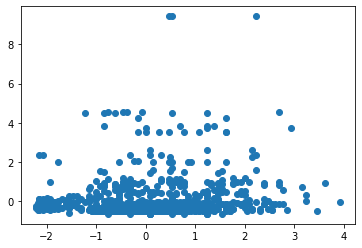

In [15]:
plt.scatter(df_train_norm.Age, df_train_norm.Fare)

### Merkmalsraum definieren
Unabhängig von der eingesetzten Methodik zur Klassifikation ist es wichtig, dass Sie sich Gedanken über den Merkmalsraum machen. Konkret bedeutet das, dass sie definieren müssen wie ein Merkmalsvektor aussieht und mit welchem Ähnlichkeitsmaß Merkmalsvektoren verglichen werden. Sie sollten sich dabei mit den folgenden Fragen auseinander setzen:
* Welche einzelnen Attribute aus einem Objekt des Datensatzes sollen verwendet werden?
* Welche Probleme ergeben sich aufgrund von unterschiedlichen Skalenniveaus der Attribute? Wie können Sie diesen begegnen? 
* Wie gehen Sie mit kategoriellen Merkmalen um?
* Welches Ähnlichkeitsmaß setzen Sie ein? 

### Merkmalsvektor extrahieren und normalisieren bzw. standardisieren
Schreiben sie eine Methode welche aus einer gegebenen Datenreihe einen Merkmalsvektor extrahiert. D.h. der Input ist eine Reihe aus dem Datensatz, der Rückgabewert ein Vektor bestehend aus den Daten.

In [16]:
# # feature : which features to keep
# def extractFeatureVector(row):
#     gender = 1
#     if row['Sex'] == 'male':
#         gender = 0
    
#     pclass_onehot= [0,0,0]
#     pclass_onehot[row['Pclass']-1]=1
#     # TODO : implement
#     return [row['Age'],row['Fare'], gender] + pclass_onehot

In [17]:
df_train_norm.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Boat', 'Body', 'Home-Dest', 'Sex_type_female',
       'Sex_type_male', 'Pclass_type_1', 'Pclass_type_2', 'Pclass_type_3',
       'Em_type_C', 'Em_type_Q', 'Em_type_S'],
      dtype='object')

In [18]:
# 2nd Variation
def extractFeature_Vector(row):
    return [row['Age'], row['Fare'], row['Sex_type_female'], row['Sex_type_male'],\
            row['Pclass_type_1'], row['Pclass_type_2'], row['Pclass_type_3'],\
            row['Em_type_C'], row['Em_type_Q'], row['Em_type_S']]

Testen Sie die Funktion auf einem beliebigen Objekt des Datensatzes. Überprüfen Sie ob das Resultat Ihren Erwartungen entspricht. 

In [19]:
# extractFeatureVector(df_train_norm.iloc[0])

Wenn Sie einen nieder-dimensionalen Merkmalsraum, bspw. zwei-dimensional, gewählt haben, lässt sich dieser sehr komfortabel visualisieren. Zum Beispiel:

<img src="./Figures/titanic-nieder-dimensional.png" alt="drawing" style="width:400px;"/>

## Implementierung
Die Implementierung erfolgt innerhalb der Klasse <b>KNN</b>. Im folgenden werden die einzelnen Methoden und deren Funktionsweise kurz vorgestellt. <br>


### Konstruktor
Das KNN-Objekt wird mit dem Wert <b>k</b> initialisiert. Dieser bestimmt die Anzahl der zu betrachtenden Nachbarn. Wählen Sie k=3 als Wert.


### distance()-Methode:
In dieser Methode gilt es eine Funktion zu implementieren, welche die Ähnlichkeit zweier Merkmalsvektoren vergleicht. Diese Methode soll die Ähnlichkeit der zwei Merkmalsvektoren, welche als Methoden-Parameter übergeben werden, bestimmen. Wählen Sie hierbei die aus der Vorlesung bekannten Distanz-Funktionen wie bspw. *Euklidische Distanz*, *Manhatten Distanz*, *Minkovski Distanz* etc. <br>

<b>Auch hier gilt</b>: Implementieren Sie die Funktion eigenständig, eine Standard-Funktion aus einem Framework ist nicht zulässig, wie bspw. *sklearn.metrics.pairwise.euclidean_distances*. Zum Testen Ihrer Implementierung können Sie diese Funktionen nutzen.


### fit()-Methode:
Als Methoden-Parameter dient der normierte Trainingsdatensatz. In dieser Methode soll das Modell anhand der Trainingsdaten gebildet werden mit dem entsprechenden zuvor definierten Merkmalsvektor. <br>
Stellen Sie sicher, dass in der Liste <b>self.trainData</b> die Merkmalsvektoren aus dem Trainingsdatensatz enthalten sind. <br>
Stellen sie sicher, dass in der Liste <b>self.trainLabel</b> die Zielwerte des Merkmals *survived* aus dem Trainingsdatensatz enthalten sind.


### predict()-Methode:
Als Methoden-Parameter dient ein Merkmalsvektor. Implementieren Sie den in der Vorlesung besprochenen Algorithmus für den KNN-Klassifikator. Der Rückgabewert der Methode ist die entsprechende Mehrheits-Entscheidung.

In [20]:
class KNN(object):
    
    def __init__(self, k):
        self.k = k

    def distance(self, vector1, vector2):
        return np.sqrt(np.nansum((vector1 - vector2)**2))
    
    
    def fit(self, df):
        trainSet = []
        for i in range (len(df)):
#             trainSet.append(extractFeatureVector(df.iloc[i]))
            # 2nd Variation
            trainSet.append(extractFeature_Vector(df.iloc[i]))

    
        self.trainData = np.array(trainSet)
        self.trainLabel = np.array(df['Survived'])
        # TODO: implement
        

    def predict(self, x):
        # TODO: implement
        dist_to_train_sample = [(self.distance(x, train_sample), i) for i, train_sample in enumerate(self.trainData)]
        sorted_dist = sorted(dist_to_train_sample, key=lambda x: x[0])
        
        k_nearest = sorted_dist[:self.k]
#         print(k_nearest)
        
        k_nearest_labels = [self.trainLabel[i] for _, i in k_nearest]
#         print(k_nearest_labels)
        
        ones = (np.sum(np.array(k_nearest_labels)))
        zeros = self.k - ones

        #tie breaker, return random
        if ones == zeros:
            return np.random(k_nearest_labels)
        
        return 1 if (ones > zeros) else 0

## Training und Test des Algorithmus

Führen die Modellbildung ("Training") anhand der KNN-Klasse und der <b>fit()</b>-Methode durch. <br>
Die <b>predict()</b>-Methode soll einen Merkmalsvektor $\vec x_q$  auf die entsprechende Klassenzugehörigkeit $l \in \{0,1\}$ abbilden. <br>
Testen Sie die <b>predict()</b>-Methode mit den von ihnen gewählten Merkmalsvektoren ( _Hinweis_ : Einsatz der <b>extractFeatureVector()</b>-Methode) aus dem normierten Testdatensatz. Ermitteln sie hierzu die Korreklassifizierungsrate.

In [21]:
def calc_accuracy(prediction_result, reality, tn, tp, fn, fp):
    true_negative, true_positive, false_negative, false_positive = tn, tp, fn, fp
    if prediction_result == reality:
        if prediction_result == 0:
            true_negative += 1
        else:
            true_positive += 1
    else:
        if prediction_result == 0:
            false_negative += 1
        else:
            false_positive += 1
    return true_negative, true_positive, false_negative, false_positive

In [22]:
knn = KNN(k=5)

knn.fit(df_train_norm)

tn, tp, fn, fp = 0, 0, 0, 0
for i in range(len(df_test_norm)):
    survival_prediction = knn.predict(extractFeatureVector(df_test_norm.iloc[i]))
    tn, tp, fn, fp = calc_accuracy(survival_prediction, df_test_norm.iloc[i]['Survived'], tn, tp, fn, fp)

NameError: name 'extractFeatureVector' is not defined

In [ ]:
print(f'accuracy: {(tp + tn)/(tp+tn+fn+fp) }')

In [ ]:
knn = KNN(k=3)

knn.fit(df_train_norm)

tn, tp, fn, fp = 0, 0, 0, 0
for i in range(len(df_test_norm)):
    survival_prediction = knn.predict(extractFeatureVector(df_test_norm.iloc[i]))
    tn, tp, fn, fp = calc_accuracy(survival_prediction, df_test_norm.iloc[i]['Survived'], tn, tp, fn, fp)

In [ ]:
print(f'accuracy: {(tp + tn)/(tp+tn+fn+fp) }')

2nd Variation

In [ ]:
knn = KNN(k=5)

knn.fit(df_train_norm)

tn, tp, fn, fp = 0, 0, 0, 0
for i in range(len(df_test_norm)):
    survival_prediction = knn.predict(extractFeature_Vector(df_test_norm.iloc[i]))
    tn, tp, fn, fp = calc_accuracy(survival_prediction, df_test_norm.iloc[i]['Survived'], tn, tp, fn, fp)

In [ ]:
print(f'accuracy: {(tp + tn)/(tp+tn+fn+fp) }')

In [ ]:
knn = KNN(k=3)

knn.fit(df_train_norm)

tn, tp, fn, fp = 0, 0, 0, 0
for i in range(len(df_test_norm)):
    survival_prediction = knn.predict(extractFeature_Vector(df_test_norm.iloc[i]))
    tn, tp, fn, fp = calc_accuracy(survival_prediction, df_test_norm.iloc[i]['Survived'], tn, tp, fn, fp)

In [ ]:
print(f'accuracy: {(tp + tn)/(tp+tn+fn+fp) }')

## Weitere Evaluation
Untersuchen Sie wie sich die Klassifikationsleistung in Abhängigkeit von verschiedenen Änhlichkeitsmaßen bzw. Merkmalsvektoren verhält. 

In [ ]:
# TODO: implement

def extract_feat_new(row):
    gender = 1
    if row['Sex'] == 'male':
        gender = 0
        
    pclass_onehot= [0,0,0]
    pclass_onehot[row['Pclass']-1]=1
    
    return [gender] + pclass_onehot



In [ ]:
class KNN(object):
    
    def __init__(self, k):
        self.k = k

    def distance(self, vector1, vector2):
        return np.sqrt(np.nansum((vector1 - vector2)**2))
    
    
    def fit(self, df):
        trainSet = []
        for i in range (len(df)):
#             trainSet.append(extractFeatureVector(df.iloc[i]))
            trainSet.append(extract_feat_new(df.iloc[i]))

    
        self.trainData = np.array(trainSet)
        self.trainLabel = np.array(df['Survived'])
        # TODO: implement
    
    def _euclidean_dist(x, y):
        return 

    def predict(self, x):
        # TODO: implement
        dist_to_train_sample = [(self.distance(x, train_sample), i) for i, train_sample in enumerate(self.trainData)]
        sorted_dist = sorted(dist_to_train_sample, key=lambda x: x[0])
        
        k_nearest = sorted_dist[:self.k]
#         print(k_nearest)
        
        k_nearest_labels = [self.trainLabel[i] for _, i in k_nearest]
#         print(k_nearest_labels)
        
        ones = (np.sum(np.array(k_nearest_labels)))
        zeros = self.k - ones

        #tie breaker, return random
        if ones == zeros:
            return np.random(k_nearest_labels)
        
        return 1 if (ones > zeros) else 0

In [ ]:
knn = KNN(k=5)

knn.fit(df_train_norm)
# survival_prediction = knn.predict(extractFeatureVector(df_test_norm.iloc[0]))
# print(survival_prediction)

correct_predictions = 0
tn, tp, fn, fp = 0, 0, 0, 0
for i in range(len(df_test_norm)):
    survival_prediction = knn.predict(extract_feat_new(df_test_norm.iloc[i]))
    tn, tp, fn, fp = calc_accuracy(survival_prediction, df_test_norm.iloc[i]['Survived'], tn, tp, fn, fp)
    if survival_prediction == df_test_norm.iloc[i]['Survived']:
        correct_predictions += 1
        
korrektklassifizierungsrate = correct_predictions / len(df_test_norm)
print(korrektklassifizierungsrate)
print(f'accuracy: {(tp + tn)/(tp+tn+fn+fp) }')